In [58]:
import matplotlib
%matplotlib inline


import pylab as PL
import random as RD
import scipy as SP
import numpy as np

RD.seed()

width = 100
height = 100
empty, tree, fire, char = range(4)


def init(initProb):
    global time, config, nextConfig, count_burnt, time_stop
    count_burnt=0
    time = 0
    time_stop = 0
    config = np.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = np.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

def step():
    global time, config, nextConfig, count_burnt, time_stop
    time += 1
    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
                count_burnt += 1
                time_stop = time
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state
    
    config, nextConfig = nextConfig, config

    



3450
199


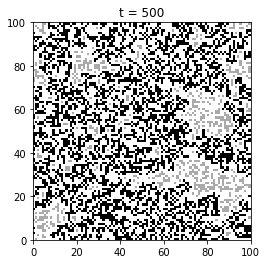

In [63]:
init(0.4)
for i in range(500):
    step()
draw()
print(count_burnt)
print(time_stop)

In [9]:
ps = np.linspace(0,1,21)

In [68]:
list_count = []
list_stop = []
for p in ps:
    init(p)
    for i in range(500):
        step()
    list_count.append(count_burnt)
    list_stop.append(time_stop)

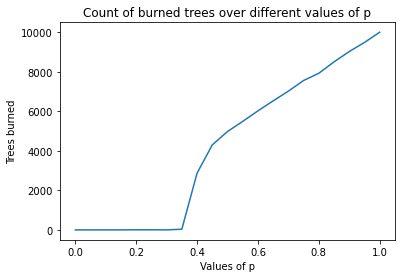

In [71]:
import matplotlib.pyplot as plt
plt.plot(ps, list_count)
plt.title("Count of burned trees over different values of p")
plt.xlabel("Values of p")
plt.ylabel("Trees burned")
plt.show()

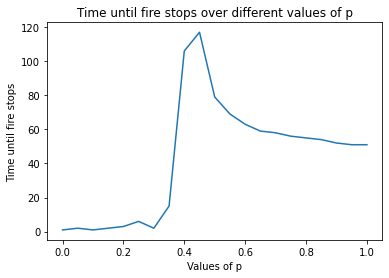

In [72]:
plt.plot(ps, list_stop)
plt.title("Time until fire stops over different values of p")
plt.xlabel("Values of p")
plt.ylabel("Time until fire stops")
plt.show()